In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [213]:
data = pd.read_csv("../Diabetics India/diabetes_prediction_india (1).csv")
data.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [214]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Urban_Rural', 'Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

In [215]:
data.dtypes

Age                                    int64
Gender                                object
BMI                                  float64
Family_History                        object
Physical_Activity                     object
Diet_Type                             object
Smoking_Status                        object
Alcohol_Intake                        object
Stress_Level                          object
Hypertension                          object
Cholesterol_Level                    float64
Fasting_Blood_Sugar                  float64
Postprandial_Blood_Sugar             float64
HBA1C                                float64
Heart_Rate                             int64
Waist_Hip_Ratio                      float64
Urban_Rural                           object
Health_Insurance                      object
Regular_Checkups                      object
Medication_For_Chronic_Conditions     object
Pregnancies                            int64
Polycystic_Ovary_Syndrome             object
Glucose_To

In [216]:
data.shape

(5292, 27)

In [217]:
data.isna().sum()

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [218]:
data.duplicated().sum()

0

In [219]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Gender: ['Male' 'Other' 'Female']
Unique values in Family_History: ['No' 'Yes']
Unique values in Physical_Activity: ['High' 'Medium' 'Low']
Unique values in Diet_Type: ['Non-Vegetarian' 'Vegetarian' 'Vegan']
Unique values in Smoking_Status: ['Never' 'Current' 'Former']
Unique values in Alcohol_Intake: [nan 'Moderate' 'High']
Unique values in Stress_Level: ['Medium' 'High' 'Low']
Unique values in Hypertension: ['Yes' 'No']
Unique values in Urban_Rural: ['Urban' 'Rural']
Unique values in Health_Insurance: ['No' 'Yes']
Unique values in Regular_Checkups: ['No' 'Yes']
Unique values in Medication_For_Chronic_Conditions: ['No' 'Yes']
Unique values in Polycystic_Ovary_Syndrome: ['0' 'No' 'Yes']
Unique values in Thyroid_Condition: ['Yes' 'No']
Unique values in Diabetes_Status: ['Yes' 'No']


In [220]:
data['Alcohol_Intake'].unique()

array([nan, 'Moderate', 'High'], dtype=object)

In [221]:
data['Alcohol_Intake']=data['Alcohol_Intake'].fillna('None')
data['Alcohol_Intake'].unique()

array(['None', 'Moderate', 'High'], dtype=object)

In [222]:
data.isna().sum()

Age                                  0
Gender                               0
BMI                                  0
Family_History                       0
Physical_Activity                    0
Diet_Type                            0
Smoking_Status                       0
Alcohol_Intake                       0
Stress_Level                         0
Hypertension                         0
Cholesterol_Level                    0
Fasting_Blood_Sugar                  0
Postprandial_Blood_Sugar             0
HBA1C                                0
Heart_Rate                           0
Waist_Hip_Ratio                      0
Urban_Rural                          0
Health_Insurance                     0
Regular_Checkups                     0
Medication_For_Chronic_Conditions    0
Pregnancies                          0
Polycystic_Ovary_Syndrome            0
Glucose_Tolerance_Test_Result        0
Vitamin_D_Level                      0
C_Protein_Level                      0
Thyroid_Condition        

In [223]:
numerical_cols = data.select_dtypes(include=['int64','float64'])
numerical_cols

,Age,BMI,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Pregnancies,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level
0,48,35.5,111.7,141.0,165.6,8.9,94,0.91,0,124.3,31.5,7.46
1,18,28.7,130.6,83.1,142.6,5.9,68,0.96,0,151.4,12.5,5.64
2,21,30.0,294.8,159.9,212.4,4.8,70,0.88,0,106.1,35.8,7.20
3,25,25.6,159.1,133.3,225.4,11.9,78,0.98,1,85.6,15.4,6.53
4,78,38.8,215.0,164.9,218.1,11.6,65,0.85,0,77.0,28.6,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...
5287,35,39.0,203.6,126.5,188.0,9.2,119,1.05,0,174.6,16.3,5.48
5288,44,32.0,214.8,162.6,127.1,7.5,108,0.92,0,119.3,32.4,7.39
5289,55,22.3,168.3,70.8,237.6,8.1,110,1.12,0,143.6,43.3,7.24
5290,65,21.7,275.1,169.9,198.4,10.6,114,0.92,0,79.8,22.2,4.00


/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


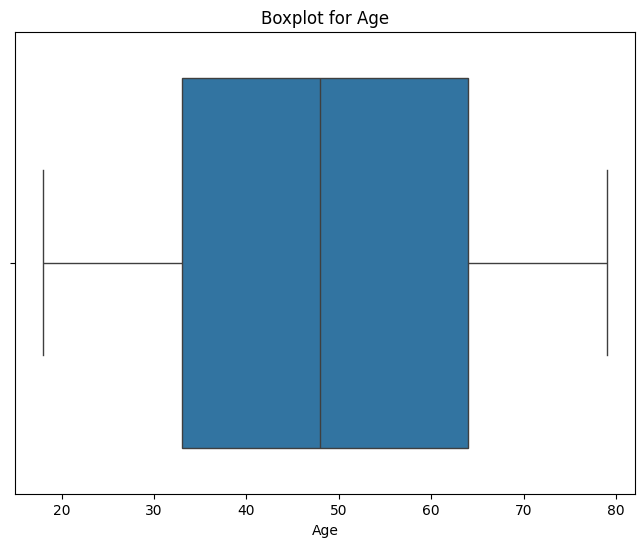

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


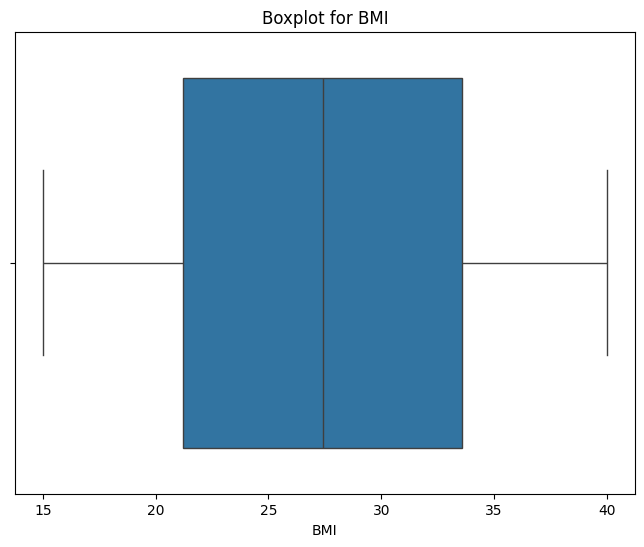

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


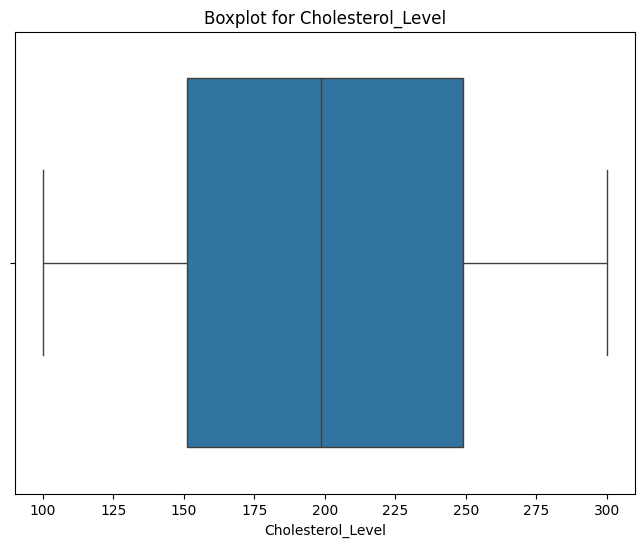

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


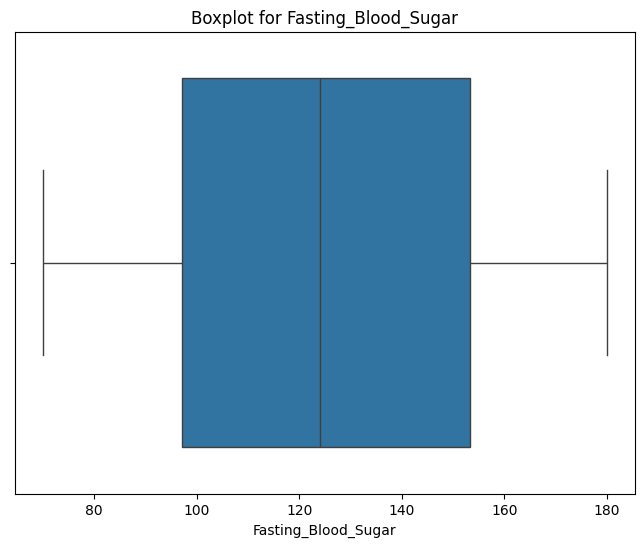

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


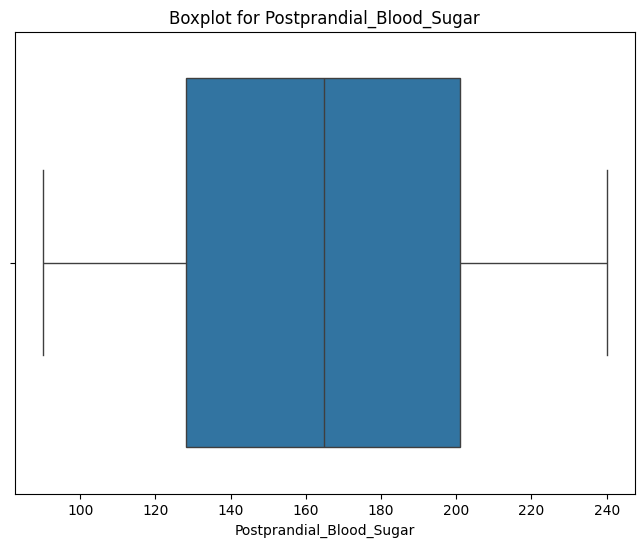

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


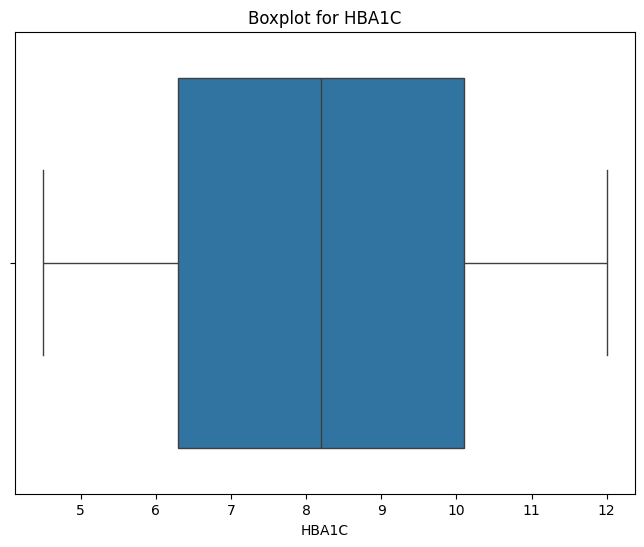

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


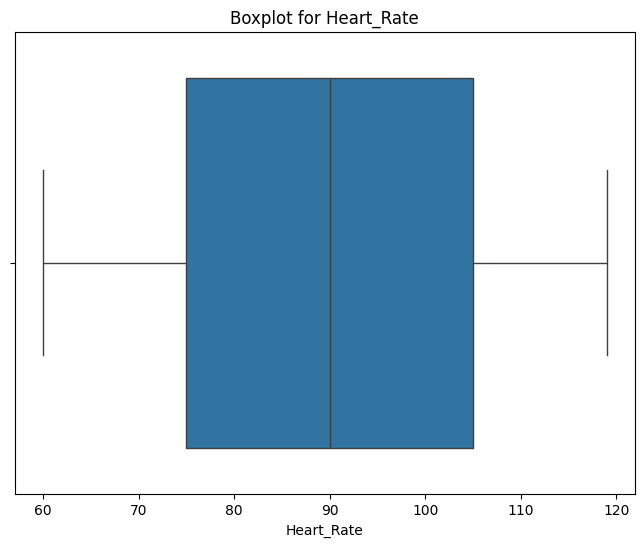

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


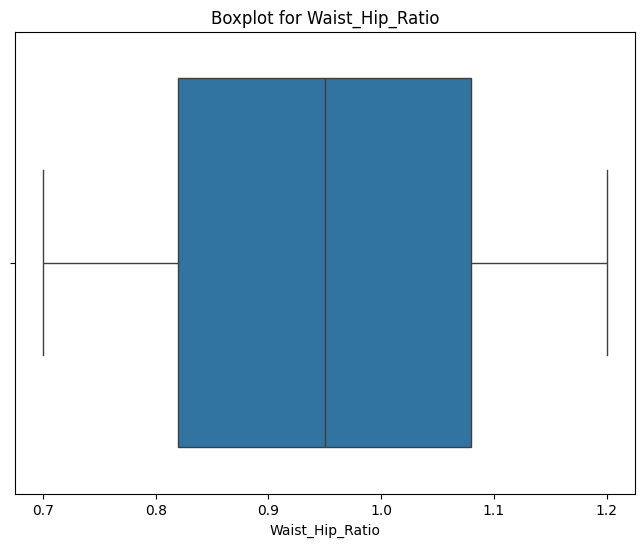

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


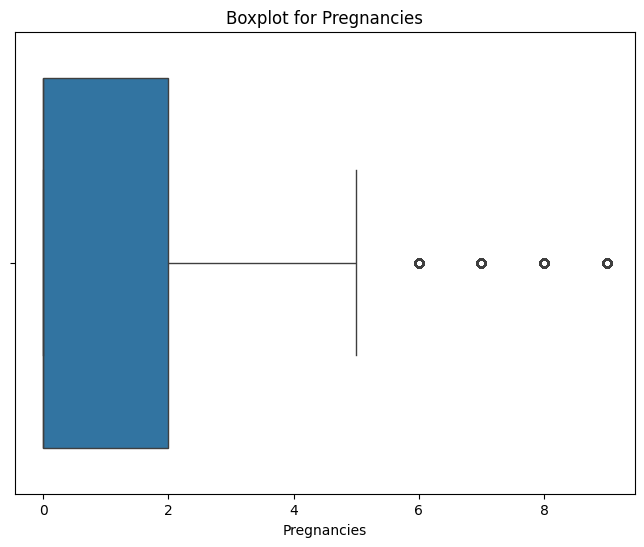

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


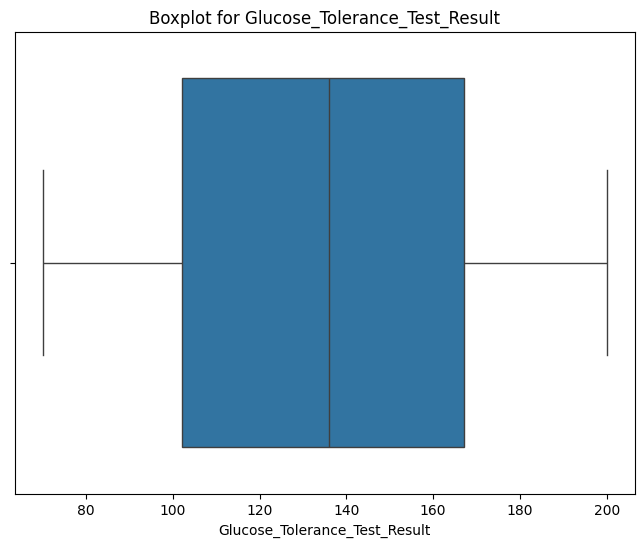

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


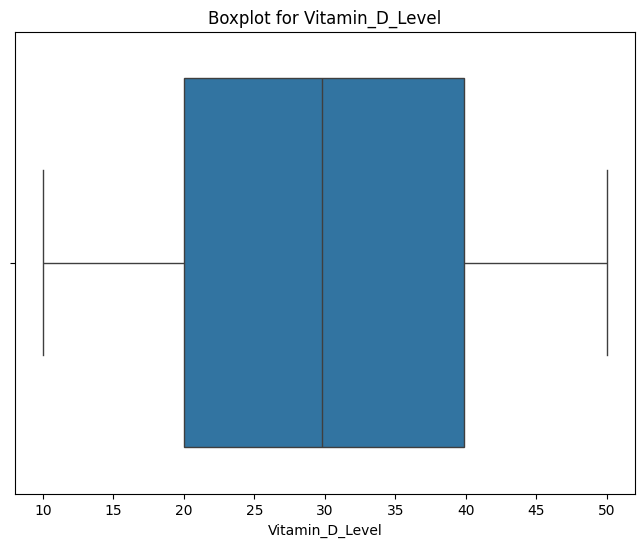

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


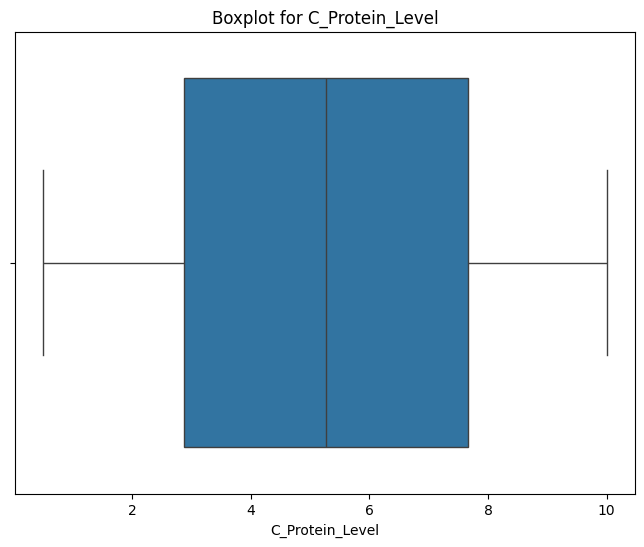

In [224]:
for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [225]:
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound,upper=upper_bound)

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


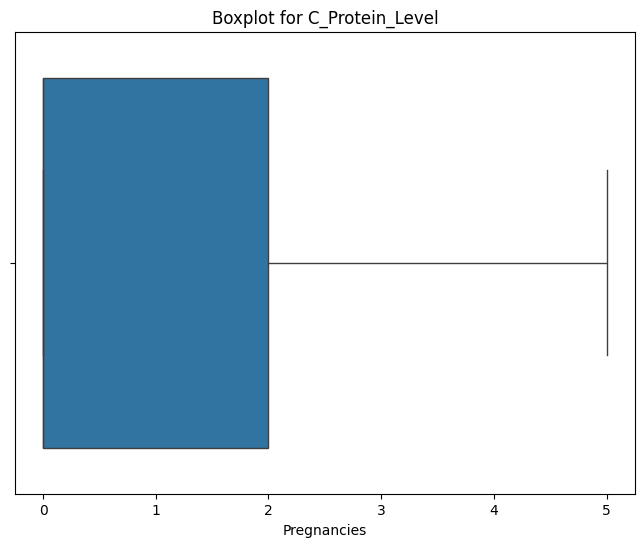

In [226]:

plt.figure(figsize=(8,6))
sns.boxplot(x=data['Pregnancies'])
plt.title(f'Boxplot for {col}')
plt.show()

In [227]:
ordinal_features = {
    "Physical_Activity": ["Low", "Medium", "High"],
    "Stress_Level": ["Low", "Medium", "High"],
    "Smoking_Status": ["Never", "Former", "Current"]
}

In [228]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [229]:

le = LabelEncoder()
for feature, categories in ordinal_features.items():
    data[feature] = le.fit_transform(data[feature].astype(str))
data["Physical_Activity"]

0       0
1       2
2       0
3       2
4       0
       ..
5287    0
5288    1
5289    0
5290    0
5291    1
Name: Physical_Activity, Length: 5292, dtype: int64

In [230]:
nominal_features = [
    "Gender", "Family_History", "Diet_Type", "Urban_Rural",
    "Health_Insurance", "Regular_Checkups",
    "Medication_For_Chronic_Conditions", "Thyroid_Condition","Alcohol_Intake","Hypertension"
]

In [231]:
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

In [232]:
data["Diabetes_Status"] = data["Diabetes_Status"].replace({'Yes':1,'No':0})
data["Polycystic_Ovary_Syndrome"] = data["Polycystic_Ovary_Syndrome"].replace({'No': 0, 'Yes': 1}).astype(int)

/var/folders/91/b90q2v1562j91y7jmf1jkdm40000gn/T/ipykernel_80136/2700436398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Diabetes_Status"] = data["Diabetes_Status"].replace({'Yes':1,'No':0})


In [233]:
data.dtypes

Age                                        int64
BMI                                      float64
Physical_Activity                          int64
Smoking_Status                             int64
Stress_Level                               int64
Cholesterol_Level                        float64
Fasting_Blood_Sugar                      float64
Postprandial_Blood_Sugar                 float64
HBA1C                                    float64
Heart_Rate                                 int64
Waist_Hip_Ratio                          float64
Pregnancies                                int64
Polycystic_Ovary_Syndrome                  int64
Glucose_Tolerance_Test_Result            float64
Vitamin_D_Level                          float64
C_Protein_Level                          float64
Diabetes_Status                            int64
Gender_Male                                 bool
Gender_Other                                bool
Family_History_Yes                          bool
Diet_Type_Vegan     

In [234]:
x = data.drop('Diabetes_Status',axis=1)
x

,Age,BMI,Physical_Activity,Smoking_Status,Stress_Level,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,...,Diet_Type_Vegan,Diet_Type_Vegetarian,Urban_Rural_Urban,Health_Insurance_Yes,Regular_Checkups_Yes,Medication_For_Chronic_Conditions_Yes,Thyroid_Condition_Yes,Alcohol_Intake_Moderate,Alcohol_Intake_None,Hypertension_Yes
0,48,35.5,0,2,2,111.7,141.0,165.6,8.9,94,...,False,False,True,False,False,False,True,False,True,True
1,18,28.7,2,0,0,130.6,83.1,142.6,5.9,68,...,False,False,False,True,True,False,True,True,False,False
2,21,30.0,0,0,0,294.8,159.9,212.4,4.8,70,...,False,False,False,False,False,True,False,True,False,True
3,25,25.6,2,1,0,159.1,133.3,225.4,11.9,78,...,False,True,False,False,False,True,True,True,False,True
4,78,38.8,0,0,0,215.0,164.9,218.1,11.6,65,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,35,39.0,0,2,1,203.6,126.5,188.0,9.2,119,...,True,False,False,True,False,True,True,True,False,True
5288,44,32.0,1,2,0,214.8,162.6,127.1,7.5,108,...,False,True,True,True,True,False,True,True,False,True
5289,55,22.3,0,0,1,168.3,70.8,237.6,8.1,110,...,False,False,True,False,False,True,True,False,True,True
5290,65,21.7,0,1,1,275.1,169.9,198.4,10.6,114,...,False,False,False,False,False,True,False,False,True,True


In [235]:
x.dtypes

Age                                        int64
BMI                                      float64
Physical_Activity                          int64
Smoking_Status                             int64
Stress_Level                               int64
Cholesterol_Level                        float64
Fasting_Blood_Sugar                      float64
Postprandial_Blood_Sugar                 float64
HBA1C                                    float64
Heart_Rate                                 int64
Waist_Hip_Ratio                          float64
Pregnancies                                int64
Polycystic_Ovary_Syndrome                  int64
Glucose_Tolerance_Test_Result            float64
Vitamin_D_Level                          float64
C_Protein_Level                          float64
Gender_Male                                 bool
Gender_Other                                bool
Family_History_Yes                          bool
Diet_Type_Vegan                             bool
Diet_Type_Vegetarian

In [236]:
y = data['Diabetes_Status']
y

0       1
1       0
2       1
3       0
4       1
       ..
5287    0
5288    1
5289    1
5290    1
5291    1
Name: Diabetes_Status, Length: 5292, dtype: int64

In [237]:
y.dtypes

dtype('int64')

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [240]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [241]:
# classifiers = {
#     'Random Forest Classifier':RandomForestClassifier(n_estimators=47,random_state=34),
#     'Logistic Regression' : LogisticRegression(random_state=42),
#     'SVM':SVC(kernel='linear'),
#     'KNN':KNeighborsClassifier(n_neighbors=5),
#     'Naive Bayes':GaussianNB(),
#     'Decision tree' : DecisionTreeClassifier(random_state=42,max_depth=5),
#     'Gradient Boosting':GradientBoostingClassifier(n_estimators=600,learning_rate=0.05,random_state=42),
#     'AdaBoost':AdaBoostClassifier(n_estimators=50,random_state=42,learning_rate=0.3),
# }

In [242]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(
        n_estimators=100, max_depth=10, min_samples_split=5, random_state=42
    ),
    
    'Logistic Regression': LogisticRegression(
        solver='liblinear', C=1.0, random_state=42
    ),
    
    'SVM': SVC(
        kernel='rbf', C=1.0, gamma='scale', probability=True
    ),
    
    'KNN': KNeighborsClassifier(
        n_neighbors=7, metric='minkowski', p=2
    ),
    
    'Naive Bayes': GaussianNB(),
    
    'Decision Tree': DecisionTreeClassifier(
        criterion='entropy', max_depth=8, min_samples_split=4, random_state=42
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=4, subsample=0.8, random_state=42
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100, learning_rate=0.1, random_state=42
    ),
}

In [243]:
results=[]

In [244]:
for name,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cm_result = confusion_matrix(y_test, y_pred)  
    cr_result = classification_report(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{name} Confusion Matrix:\n{cm_result}')
    print(f'{name} Classification Report:\n{cr_result}')
    print("\n\n")
    results.append({'Model Name':name,'Accuracy Score':accuracy*100})

Random Forest Classifier Accuracy: 50.13%
Random Forest Classifier Confusion Matrix:
[[279 492]
 [300 517]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       771
           1       0.51      0.63      0.57       817

    accuracy                           0.50      1588
   macro avg       0.50      0.50      0.49      1588
weighted avg       0.50      0.50      0.49      1588




Logistic Regression Accuracy: 48.43%
Logistic Regression Confusion Matrix:
[[287 484]
 [335 482]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.37      0.41       771
           1       0.50      0.59      0.54       817

    accuracy                           0.48      1588
   macro avg       0.48      0.48      0.48      1588
weighted avg       0.48      0.48      0.48      1588




SVM Accuracy: 49.56%
SVM Confusion Matrix:


/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 48.17%
AdaBoost Confusion Matrix:
[[172 599]
 [224 593]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.22      0.29       771
           1       0.50      0.73      0.59       817

    accuracy                           0.48      1588
   macro avg       0.47      0.47      0.44      1588
weighted avg       0.47      0.48      0.45      1588






In [245]:
models = pd.DataFrame(results)
df_unique = models.drop_duplicates(subset=['Model Name'], keep='last')
df_unique

,Model Name,Accuracy Score
0,Random Forest Classifier,50.125945
1,Logistic Regression,48.425693
2,SVM,49.559194
3,KNN,52.267003
4,Naive Bayes,47.670025
5,Decision Tree,51.700252
6,Gradient Boosting,48.614610
7,AdaBoost,48.173804


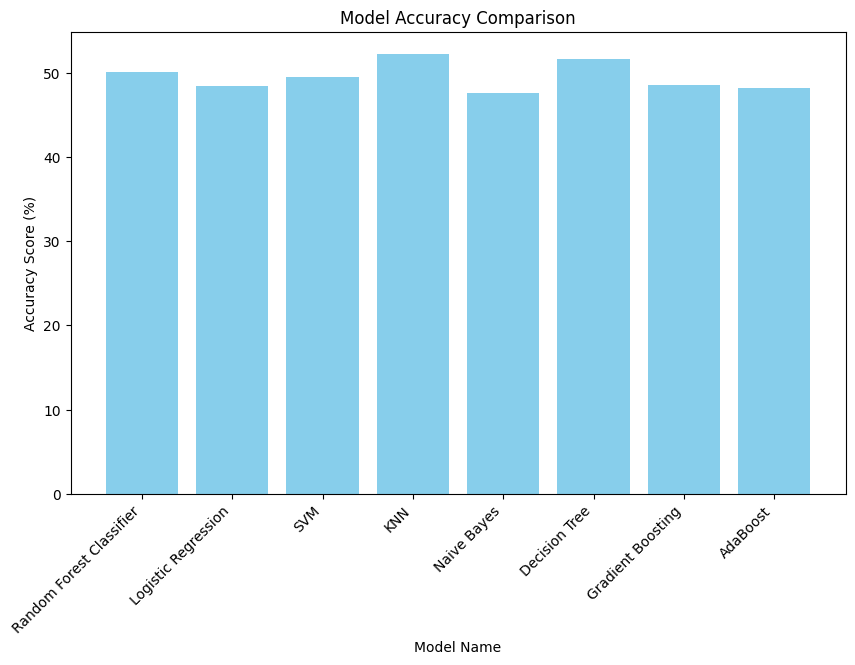

In [246]:
# Plotting the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(df_unique['Model Name'], df_unique['Accuracy Score'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.show()